In [1]:
import pandas as pd

In [2]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
            'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                sep='\t',
                usecols=columns)

In [3]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [4]:
df.shape

(2930, 6)

### **Using map function to convert string to integer**

In [5]:
df['Central Air'] = df['Central Air'].map({'N':0,'Y':1})

In [6]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

As we can see total bsmt sf contains 1 null value so remove it using dropna where we remove the row containing this null value as we have large number of data it doesn't hamper much

In [7]:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [8]:
df.shape

(2929, 6)

In [17]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


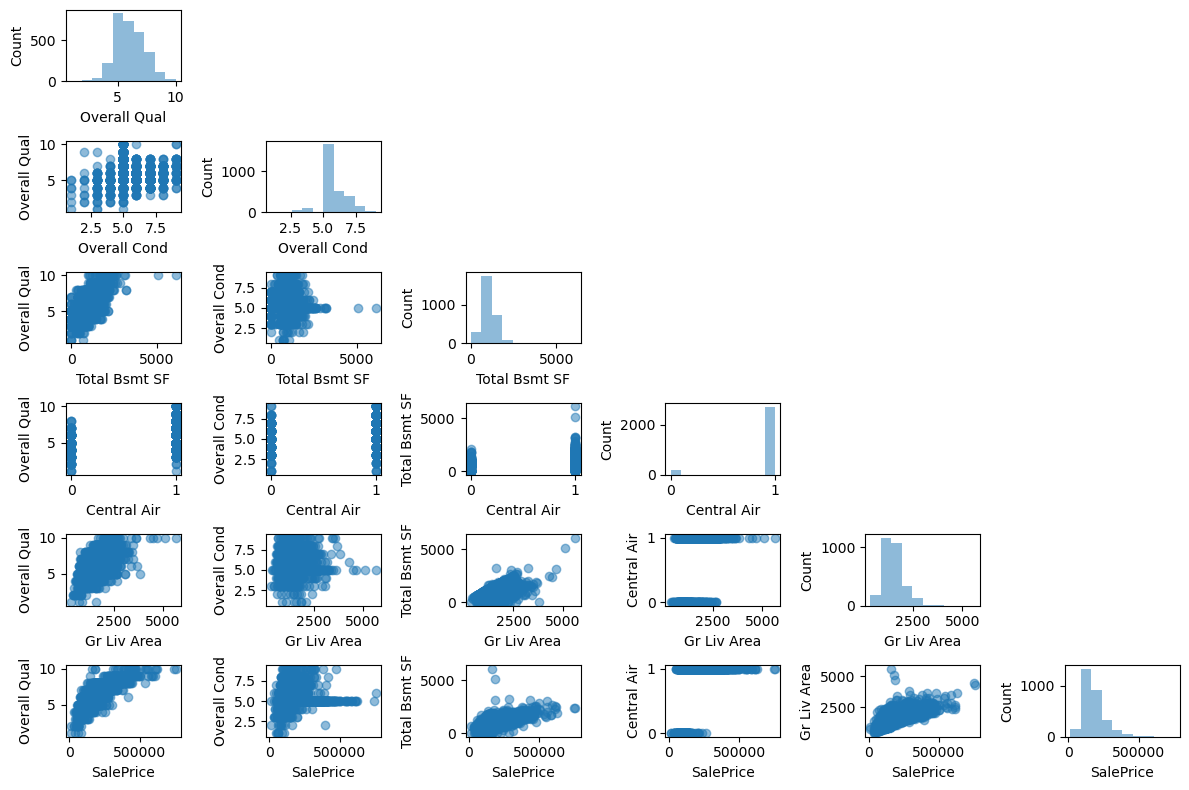

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values,figsize=(12,8),
                 names=df.columns,alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
from mlxtend.plotting import heatmap

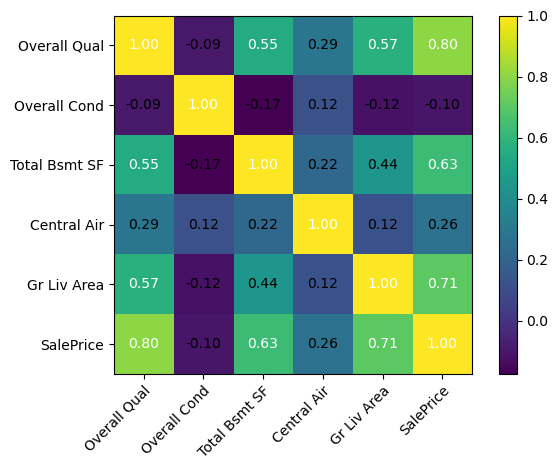

In [11]:
cm = np.corrcoef(df.values.T)
hm = heatmap(cm,row_names=df.columns,column_names=df.columns)
plt.tight_layout()
plt.show()

In [12]:
class LinearRegressionGD:
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size = X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
            
        return self

    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_

    def predict(self,X):
        return self.net_input(X)

In [13]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
print(X)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()## added new dimension to the array
y_std

[[1656]
 [ 896]
 [1329]
 ...
 [ 970]
 [1389]
 [2000]]


array([ 0.42783926, -0.94949293, -0.11057241, ..., -0.61142048,
       -0.13561481,  0.08976682])

In [14]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std,y_std)

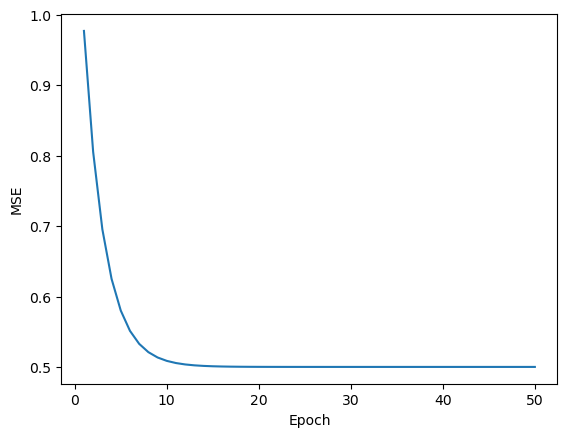

In [15]:
plt.plot(range(1,lr.n_iter+1),lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [16]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)

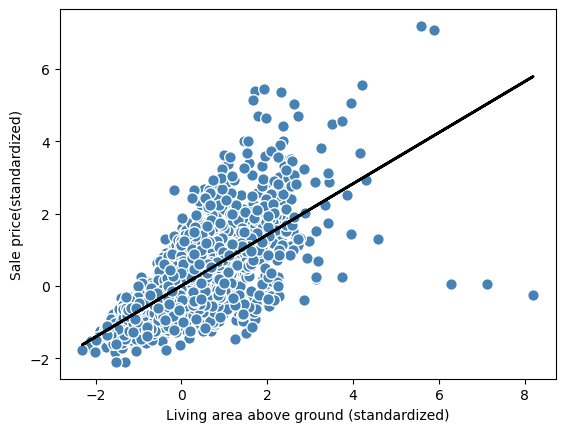

In [17]:
lin_regplot(X_std,y_std,lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price(standardized)')
plt.show()

In [18]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1,1))
print(f'Sales price:${target_reverted.flatten()[0]:.2f}')

Sales price:$292507.07


In [19]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept {lr.b_[0]:.3f}')

Slope: 0.707
Intercept -0.000


Scikit learn implementation of linear regression

In [20]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)
print(f'Slpoe: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slpoe: 111.666
Intercept: 13342.979


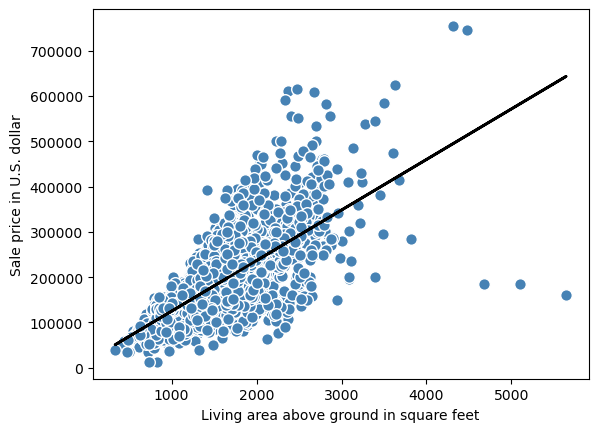

In [21]:
lin_regplot(X,y,slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollar')
plt.show()

## **RANSAC ALGORITHM**

In [22]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples = 0.95,
                        residual_threshold=None,
                        random_state = 123)
ransac.fit(X,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

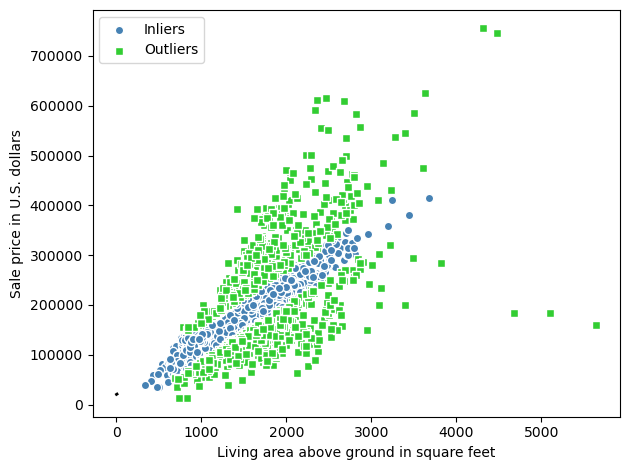

In [23]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask],
           c='steelblue',edgecolor='white',
           marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],
           c='limegreen',edgecolor='white',
           marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='black',lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


Threshold computation using MAD 

In [25]:
def mean_absolute_deviation(data):
    return np.mean(np.abs(data-np.mean(data)))
mean_absolute_deviation(y)

58269.561754979375

In [26]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=123)
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

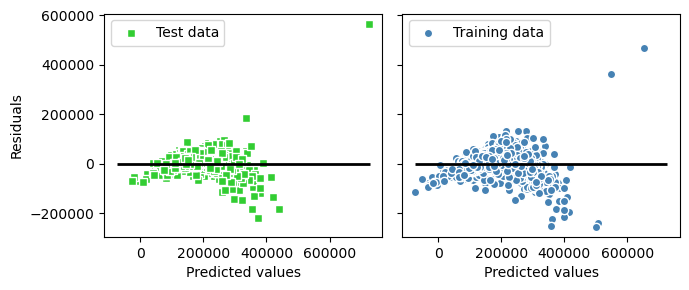

In [29]:
x_max = np.max([np.max(y_train_pred),np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred),np.min(y_test_pred)])

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),sharey=True)
ax1.scatter(y_test_pred,y_test_pred-y_test,
           c='limegreen',marker='s',
           edgecolor='white',
           label='Test data')
ax2.scatter(y_train_pred,y_train_pred-y_train,
           c='steelblue',marker='o',edgecolor='white',
           label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1,ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0,xmin=x_min-100,xmax=x_max+100,
             color='black',lw=2)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


In [31]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train,y_train_pred)
mae_test = mean_absolute_error(y_test,y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


In [32]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)
print(f'R2 train: {train_r2:.3f},{test_r2:.3f}')

R2 train: 0.769,0.752


## **Using regularized methods for regression**

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [34]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0,l1_ratio=0.5)

### **Turning a linear regression model into curve- polynomial regression**

In [35]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,
            446.0,480.0,586.0])[:,np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,
             342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [36]:
lr.fit(X,y)
X_fit = np.arange(250,600,10)[:,np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [37]:
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

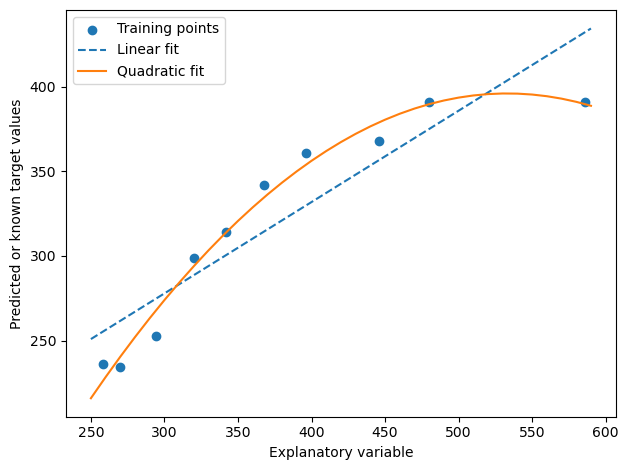

In [38]:
plt.scatter(X,y,label='Training points')
plt.plot(X_fit,y_lin_fit,
        label='Linear fit',linestyle='--')
plt.plot(X_fit,y_quad_fit,
        label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()